# Part A: Parsing to datastructure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
with open('pf.log', 'r' ) as f:
    lines = f.readlines()
lines = [line.strip() for line in lines]     

In [3]:
i=0    
j=0    
length = len(lines)    

final = [] #parsed log file stored in list datastructure
    
while(i != length):
    val1 = lines[i].split(':')   
    i = i + 1
    j = j + 1
    while(i != length and lines[i][0] == '<'):  
        val2 = lines[i].split('+')
        lib = val2[0].strip('<')
        val3 = val2[1].split('/') 
        offset = int(val3[0], 16)   #converted to int
        addr = int(val3[1].strip('>'), 16)    #converted to int
        result = '\t'.join([str(j), val1[0], val1[1], val1[2], str(int(val1[3], 16)), val1[4], val1[5], val1[6], lib, str(addr), str(offset)])          
        i = i + 1
        final.append(result)
        

In [4]:
final[:5]

['1\t1506816069251\tfirefox\t13179\t10773289646\tR\tminor\t50\t/usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10\t16727808\t686943',
 '1\t1506816069251\tfirefox\t13179\t10773289646\tR\tminor\t50\t/lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1\t16748032\t660132',
 '1\t1506816069251\tfirefox\t13179\t10773289646\tR\tminor\t50\t/lib/x86_64-linux-gnu/libpthread-2.26.so\t16746496\t483292',
 '1\t1506816069251\tfirefox\t13179\t10773289646\tR\tminor\t50\t/usr/lib/x86_64-linux-gnu/libX11.so.6.3.0\t16748800\t108902',
 '1\t1506816069251\tfirefox\t13179\t10773289646\tR\tminor\t50\t/lib/x86_64-linux-gnu/libc-2.26.so\t16767232\t7501']

In [5]:
with open('pf.csv', 'w') as f:
    f.write('\t'.join(['index', 'time', 'proc_name', 'pid', 'pfaddr', 'rw', 'major_minor', 'resolve_time', 'lib', 'addr', 'offset']))
    f.write('\n')
    for element in final:
        f.write(element)
        f.write('\n')

In [6]:
df = pd.read_csv('pf.csv', sep = '\t', parse_dates = ['time'])
df.set_index(df['index'], inplace=True)  #setting index of data frame
df.head()

,index,time,proc_name,pid,pfaddr,rw,major_minor,resolve_time,lib,addr,offset
index,,,,,,,,,,,
1,1,1506816069251,firefox,13179,10773289646,R,minor,50,/usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10,16727808,686943
1,1,1506816069251,firefox,13179,10773289646,R,minor,50,/lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1,16748032,660132
1,1,1506816069251,firefox,13179,10773289646,R,minor,50,/lib/x86_64-linux-gnu/libpthread-2.26.so,16746496,483292
1,1,1506816069251,firefox,13179,10773289646,R,minor,50,/usr/lib/x86_64-linux-gnu/libX11.so.6.3.0,16748800,108902
1,1,1506816069251,firefox,13179,10773289646,R,minor,50,/lib/x86_64-linux-gnu/libc-2.26.so,16767232,7501


# Part B: Data Analysis

### a. What time range does this data cover?

In [7]:
start_date = pd.to_datetime(df['time'], unit='ms').min()
end_date = pd.to_datetime(df['time'], unit='ms').max()
range_date = end_date - start_date
print("start date:", start_date)
print("end date:", end_date)
print("time range:",range_date)

start date: 2017-10-01 00:01:09.251000
end date: 2018-01-07 18:59:50.839000
time range: 98 days 18:58:41.588000


### b. How many unique processes were executed over this period? How many times was each process executed?

In [8]:
count = df.groupby(df['proc_name'])['index'].unique()
len(count) #Number of unique processes

12

In [9]:
proc_name = set(df['proc_name'])
for i in range(len(count)):
    print(count.index[i], len(count[i])) 

auditd 57185
bash 57427
firefox 58289
gitlab-runner 54543
google-chrome 59596
htop 58304
sshd 61721
subl 61746
thunderbird 59393
tmux 54661
watchdog 58839
xorg 61072


### c. Compare the number of major & minor page faults for each process (averaged over all runs). Plot a bar chart with two categories ‑ major & minor, to demonstrate your results.

In [10]:
process = df.groupby(['proc_name', 'major_minor'])['index'].unique()
process


proc_name      major_minor
auditd         major          [66, 124, 166, 238, 265, 322, 340, 392, 610, 6...
               minor          [6, 8, 11, 12, 15, 16, 18, 25, 26, 28, 33, 35,...
bash           major          [548, 555, 577, 582, 597, 820, 845, 1522, 1576...
               minor          [462, 463, 468, 473, 476, 487, 494, 497, 515, ...
firefox        major          [49, 60, 87, 142, 178, 225, 240, 254, 287, 301...
               minor          [1, 2, 9, 10, 13, 14, 23, 24, 30, 46, 47, 50, ...
gitlab-runner  major          [32, 119, 274, 300, 331, 498, 507, 818, 866, 9...
               minor          [39, 62, 140, 146, 209, 215, 219, 252, 264, 27...
google-chrome  major          [550, 659, 712, 798, 846, 847, 991, 1002, 1116...
               minor          [453, 464, 469, 475, 517, 525, 542, 549, 556, ...
htop           major          [2137, 2144, 2171, 2194, 2214, 2255, 2291, 238...
               minor          [2099, 2104, 2113, 2115, 2122, 2140, 2142, 214...
sshd         

auditd major 5701
auditd minor 51484
bash major 5713
bash minor 51714
firefox major 5991
firefox minor 52298
gitlab-runner major 5291
gitlab-runner minor 49252
google-chrome major 5938
google-chrome minor 53658
htop major 5902
htop minor 52402
sshd major 6089
sshd minor 55632
subl major 6129
subl minor 55617
thunderbird major 5857
thunderbird minor 53536
tmux major 5478
tmux minor 49183
watchdog major 5872
watchdog minor 52967
xorg major 6078
xorg minor 54994


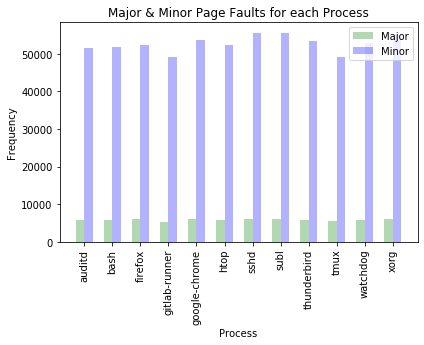

In [11]:
process = df.groupby(['proc_name','major_minor'])['index'].unique()

process_list = []
major_val = []
minor_val = []

for i in range(len(process)):
    process_name = process.index[i][0]
    name = process.index[i][1]
    val = len(process[i])
    print(process_name, name, val)
    if  name == 'major':
        process_list.append(process_name)
        major_val.append(val)
    else:
        minor_val.append(val)

fig, ax = plt.subplots()         
n_groups = len(process_list)
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.3

rects1 = ax.bar(index, major_val, bar_width, alpha=opacity, color='g',label='Major')
rects2 = ax.bar(index + bar_width, minor_val, bar_width,alpha=opacity, color='b',label='Minor')

ax.set_xlabel('Process')
ax.set_ylabel('Frequency')
ax.set_title('Major & Minor Page Faults for each Process')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(process_list)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=90,fontsize = 10)
plt.show()

### d. Plot the histogram for the time to resolve page faults. Label the axes. For each process, report the mean and standard deviation of the time to resolve page faults. Plotting and calculations should be done for major and minor page faults separately.

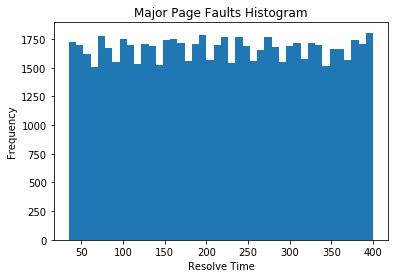

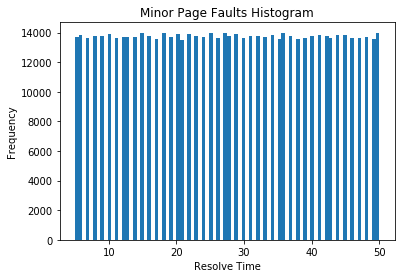

In [12]:
unique_index = df.groupby(df['index']).head(1)
major_dist = list(unique_index[unique_index['major_minor'] == 'major']['resolve_time'])
minor_dist = list(unique_index[unique_index['major_minor'] == 'minor']['resolve_time'])
plt.hist(major_dist, bins='auto')  # Major Faults Histogram
plt.ylabel('Frequency')
plt.xlabel('Resolve Time')
plt.title('Major Page Faults Histogram')
plt.show()
plt.hist(minor_dist, bins='auto')  #Minor Faults Histogram
plt.ylabel('Frequency')
plt.xlabel('Resolve Time')
plt.title('Minor Page Faults Histogram')
plt.show()

In [13]:
df_major = df[df['major_minor'] == 'major']
mean_std = df_major.groupby('proc_name').agg({'resolve_time':['mean', 'std']})
mean_std

resolve_time            
                      mean         std
proc_name                             
auditd          218.191273  105.493006
bash            219.380514  105.209861
firefox         219.960241  104.477581
gitlab-runner   213.306051  105.639431
google-chrome   218.813443  104.972038
htop            219.088798  104.744666
sshd            216.805671  105.636435
subl            215.073090  106.021568
thunderbird     219.667928  106.878117
tmux            219.742614  105.805424
watchdog        215.778328  105.352504
xorg            216.892856  105.984679

# Part C: Making Predictions

### a. Assume that the process variable is the class. Calculate the priors for all the classes.

In [14]:
class_proc=list(df['proc_name'].unique())
for i in class_proc:
    prior=df['proc_name']==i
    prob_prior=prior.sum()/len(df)
    print(i)
    print(prob_prior)

firefox
0.08308695743471528
thunderbird
0.08455969628409267
watchdog
0.08361583368657
auditd
0.08149605780766914
subl
0.08754645907384016
gitlab-runner
0.07773164050224025
sshd
0.0878742484600839
google-chrome
0.08474369966377564
bash
0.08182420309986971
tmux
0.07806049760635449
xorg
0.08681400461467664
htop
0.08264670176611214


### b. Given that the page fault was major, which process was it most likely caused by? Use the MAP rule.

In [15]:
major_minor_probs = df.groupby('major_minor').size().div(len(df))
df.groupby(['proc_name', 'major_minor']).size().div(len(df)).div(major_minor_probs, axis=0, level='major_minor')



proc_name      major_minor
auditd         major          0.082049
               minor          0.081435
bash           major          0.082206
               minor          0.081782
firefox        major          0.086550
               minor          0.082703
gitlab-runner  major          0.076026
               minor          0.077921
google-chrome  major          0.084353
               minor          0.084787
htop           major          0.084132
               minor          0.082482
sshd           major          0.086906
               minor          0.087982
subl           major          0.086796
               minor          0.087630
thunderbird    major          0.082912
               minor          0.084742
tmux           major          0.077613
               minor          0.078110
watchdog       major          0.083458
               minor          0.083633
xorg           major          0.086999
               minor          0.086794
dtype: float64

Using MAP rule we conclude that given page fault was "Major", the process which causes the page fault is "xorg"

### c. Given that the page fault came from a read access, which process was it mostlikely caused by? Use the MAP rule.

In [16]:
rw_probs = df.groupby('rw').size().div(len(df))
df.groupby(['proc_name', 'rw']).size().div(len(df)).div(rw_probs, axis=0, level='rw')

proc_name      rw
auditd         R     0.081484
               W     0.081525
bash           R     0.081642
               W     0.082249
firefox        R     0.083216
               W     0.082786
gitlab-runner  R     0.077746
               W     0.077699
google-chrome  R     0.084581
               W     0.085122
htop           R     0.082886
               W     0.082090
sshd           R     0.087562
               W     0.088603
subl           R     0.087437
               W     0.087801
thunderbird    R     0.084585
               W     0.084500
tmux           R     0.078369
               W     0.077341
watchdog       R     0.083717
               W     0.083381
xorg           R     0.086775
               W     0.086904
dtype: float64

Using MAP rule we conclude that given page fault was from "Read Access", the process which causes the page fault is "sshd"

The Naive Bayes model can be used here to calculate the conditional probabilities and classify the process given information about the severity of the fault (major/minor),and the access type of the fault (read/write).